# Stony Brook Claims Data Analysis

This notebook analyzes sample claims data from Stony Brook University Hospital to:
- Understand provider billing patterns
- Explore payer mix
- Identify common diagnoses and procedures
- Examine relationships between charges, payers, and service locations

Data files:
- `STONYBRK_20240531_HEADER.csv`
- `STONYBRK_20240531_LINE.csv`
- `STONYBRK_20240531_CODE.csv`


In [36]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make tables easier to read
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


In [37]:
# Path to your data folder
data_path = "data/"

header_file = data_path + "STONYBRK_20240531_HEADER.csv"
line_file   = data_path + "STONYBRK_20240531_LINE.csv"
code_file   = data_path + "STONYBRK_20240531_CODE.csv"

# Load CSVs
df_header = pd.read_csv(header_file)
df_line   = pd.read_csv(line_file)
df_code   = pd.read_csv(code_file)

# Quick confirmation
df_header.head()


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/25/23 0:00,9/25/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/27/23 0:00,9/27/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/29/23 0:00,9/29/23 0:00,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


## Part 1: Data Loading and Exploration

We start by exploring each of the three files:
- HEADER (one row per claim)
- LINE (one row per service line)
- CODE (one row per diagnosis code)


In [38]:
print("HEADER shape:", df_header.shape)
display(df_header.head())

print("\nHEADER info:")
df_header.info()

print("\nHEADER missing values:")
print(df_header.isna().sum())

print("\nHEADER numeric descriptive stats:")
display(df_header.describe())


HEADER shape: (388, 43)


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/25/23 0:00,9/25/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/27/23 0:00,9/27/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/29/23 0:00,9/29/23 0:00,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN



HEADER info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientId                 388 non-null    int64  
 1   ProspectiveClaimId       388 non-null    int64  
 2   ClaimType                388 non-null    object 
 3   BillingProviderNPI       388 non-null    int64  
 4   BillingProvFirstName     388 non-null    object 
 5   BillingProvLastName      0 non-null      float64
 6   AttendingProviderNPI     2 non-null      float64
 7   AttendingProvFirstName   2 non-null      object 
 8   AttendingProvLastName    2 non-null      object 
 9   RenderingProviderNPI     388 non-null    int64  
 10  RenderingProvFirstName   388 non-null    object 
 11  RenderingProvLastName    388 non-null    object 
 12  ReferringProviderNPI     87 non-null     float64
 13  ReferringProvFirstName   87 non-null     object 
 14  ReferringPro

,ClientId,ProspectiveClaimId,BillingProviderNPI,BillingProvLastName,AttendingProviderNPI,RenderingProviderNPI,ReferringProviderNPI,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,PrimaryPayerCode,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,CoderId,PlaceOfService,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
count,388.0,3.880000e+02,3.880000e+02,0.0,2.000000e+00,3.880000e+02,8.700000e+01,0.0,0.0,0.0,388.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.0,388.000000,388.000000,388.0,0.0,0.0,0.0
mean,49.0,3.670543e+07,1.462851e+09,NaN,1.472878e+09,1.565732e+09,1.538206e+09,NaN,NaN,NaN,177.654639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,17.664948,316.175258,0.0,NaN,NaN,NaN
std,0.0,3.562317e+05,3.247005e+08,NaN,6.069869e+08,2.863497e+08,2.676761e+08,NaN,NaN,NaN,176.681802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.798913,0.380678,0.0,NaN,NaN,NaN
min,49.0,3.521699e+07,1.063469e+09,NaN,1.043673e+09,1.003467e+09,1.003264e+09,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
25%,49.0,3.669166e+07,1.154376e+09,NaN,1.258275e+09,1.295152e+09,1.391558e+09,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
50%,49.0,3.683352e+07,1.437106e+09,NaN,1.472878e+09,1.467003e+09,1.518953e+09,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
75%,49.0,3.688171e+07,1.821036e+09,NaN,1.687480e+09,1.902082e+09,1.780521e+09,NaN,NaN,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
max,49.0,3.700149e+07,1.982659e+09,NaN,1.902082e+09,1.992124e+09,1.992068e+09,NaN,NaN,NaN,903.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,23.000000,317.000000,0.0,NaN,NaN,NaN


In [39]:
print("LINE shape:", df_line.shape)
display(df_line.head())

print("\nLINE info:")
df_line.info()

print("\nLINE missing values:")
print(df_line.isna().sum())

print("\nLINE numeric descriptive stats:")
display(df_line.describe())


LINE shape: (520, 28)


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,DxMap1,DxMap2,DxMap3,DxMap4,ServiceDate,ServiceThruDate,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/27/2023,09/27/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/29/2023,09/29/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"



LINE info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ClientId             520 non-null    int64  
 1   ProspectiveClaimId   520 non-null    int64  
 2   LinePos              520 non-null    int64  
 3   RevCode              0 non-null      float64
 4   HCPCS                520 non-null    object 
 5   Modifier1            247 non-null    object 
 6   Modifier2            38 non-null     object 
 7   Modifier3            0 non-null      float64
 8   Modifier4            0 non-null      float64
 9   DxMapDelim           520 non-null    object 
 10  DxMap1               520 non-null    int64  
 11  DxMap2               340 non-null    float64
 12  DxMap3               232 non-null    float64
 13  DxMap4               167 non-null    float64
 14  ServiceDate          520 non-null    object 
 15  ServiceThruDate      520 non

,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


In [40]:
print("CODE shape:", df_code.shape)
display(df_code.head())

print("\nCODE info:")
df_code.info()

print("\nCODE missing values:")
print(df_code.isna().sum())

print("\nCODE numeric descriptive stats:")
display(df_code.describe())


CODE shape: (1536, 9)


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN



CODE info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClientId            1536 non-null   int64  
 1   ProspectiveClaimId  1536 non-null   int64  
 2   CodeQualifier       1536 non-null   object 
 3   CodePos             1536 non-null   int64  
 4   CodeValue           1536 non-null   object 
 5   CodeFromDate        0 non-null      float64
 6   CodeToDate          0 non-null      float64
 7   CodeAmnt            0 non-null      float64
 8   POAInd              0 non-null      float64
dtypes: float64(4), int64(3), object(2)
memory usage: 108.1+ KB

CODE missing values:
ClientId                 0
ProspectiveClaimId       0
CodeQualifier            0
CodePos                  0
CodeValue                0
CodeFromDate          1536
CodeToDate            1536
CodeAmnt              1536
POAInd                1536
dtype: int64



,ClientId,ProspectiveClaimId,CodePos,CodeFromDate,CodeToDate,CodeAmnt,POAInd
count,1536.0,1.536000e+03,1536.000000,0.0,0.0,0.0,0.0
mean,49.0,3.655962e+07,3.666016,NaN,NaN,NaN,NaN
std,0.0,4.706310e+05,2.735657,NaN,NaN,NaN,NaN
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,NaN
25%,49.0,3.646555e+07,1.000000,NaN,NaN,NaN,NaN
50%,49.0,3.675250e+07,3.000000,NaN,NaN,NaN,NaN
75%,49.0,3.686023e+07,5.000000,NaN,NaN,NaN,NaN
max,49.0,3.700149e+07,12.000000,NaN,NaN,NaN,NaN


In [41]:
# How many unique claims in each file?
n_claims_header = df_header["ProspectiveClaimId"].nunique()
n_claims_line   = df_line["ProspectiveClaimId"].nunique()
n_claims_code   = df_code["ProspectiveClaimId"].nunique()

print("Unique claims (HEADER):", n_claims_header)
print("Unique claims (LINE):  ", n_claims_line)
print("Unique claims (CODE):  ", n_claims_code)


Unique claims (HEADER): 388
Unique claims (LINE):   388
Unique claims (CODE):   388


In [42]:
# Convert service dates to datetime
df_header["ServiceFromDate"] = pd.to_datetime(df_header["ServiceFromDate"])
df_header["ServiceToDate"]   = pd.to_datetime(df_header["ServiceToDate"])

date_min = df_header["ServiceFromDate"].min()
date_max = df_header["ServiceToDate"].max()

print("Service date range:")
print("From:", date_min)
print("To:  ", date_max)


Service date range:
From: 2023-09-25 00:00:00
To:   2024-05-29 00:00:00


/tmp/ipython-input-2184275538.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header["ServiceFromDate"] = pd.to_datetime(df_header["ServiceFromDate"])
/tmp/ipython-input-2184275538.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header["ServiceToDate"]   = pd.to_datetime(df_header["ServiceToDate"])


In [43]:
# Count lines per claim in LINE file
lines_per_claim = df_line.groupby("ProspectiveClaimId").size()

avg_lines_per_claim = lines_per_claim.mean()
print("Average number of service lines per claim:", avg_lines_per_claim)


Average number of service lines per claim: 1.3402061855670102


In [44]:
# Count diagnosis codes per claim in CODE file
dx_per_claim = df_code.groupby("ProspectiveClaimId").size()

avg_dx_per_claim = dx_per_claim.mean()
print("Average number of diagnosis codes per claim:", avg_dx_per_claim)


Average number of diagnosis codes per claim: 3.9587628865979383


### Part 1 Observations

- Number of unique claims in dataset: `388`
- Date range of claims: `ServiceFromDate` from `2023-09-25` to `2024-05-29`
- Average service lines per claim: `1.3402061855670102`
- Average diagnosis codes per claim: `3.9587628865979383`


## Part 2: Relational Data Analysis

### Question 1: Provider Analysis
- Who are the top 5 billing providers by number of claims?
- Display provider name, NPI, and claim count.
- Create a bar chart for the top 5 providers.


In [45]:

billing_npi_col = "BillingProviderNPI"
billing_name_col = "BillingProviderName"
print("Columns in HEADER:", df_header.columns)

# If provider name isn't present, create a placeholder
if billing_name_col not in df_header.columns:
    df_header[billing_name_col] = "Unknown Provider"

# Group by billing provider NPI
provider_claim_counts = (
    df_header
    .groupby([billing_npi_col, billing_name_col])["ProspectiveClaimId"]
    .nunique()
    .reset_index(name="ClaimCount")
    .sort_values("ClaimCount", ascending=False)
)

top5_providers = provider_claim_counts.head(5)
top5_providers


Columns in HEADER: Index(['ClientId', 'ProspectiveClaimId', 'ClaimType', 'BillingProviderNPI', 'BillingProvFirstName',
       'BillingProvLastName', 'AttendingProviderNPI', 'AttendingProvFirstName', 'AttendingProvLastName',
       'RenderingProviderNPI', 'RenderingProvFirstName', 'RenderingProvLastName', 'ReferringProviderNPI',
       'ReferringProvFirstName', 'ReferringProvLastName', 'OperatingProviderNPI', 'OperatingProvFirstName',
       'OperatingProvLastName', 'ServiceFromDate', 'ServiceToDate', 'PrimaryPayerName', 'PrimaryPayerCode',
       'PrimaryPayerCFI', 'SecondaryPayer', 'SecondaryPayerCode', 'SecondaryPayerCFI', 'TertianaryPayer',
       'TertianaryPayerCode', 'TertianaryPayerCFI', 'DRG', 'AdmitType', 'DischargeStatus', 'AdmitDx',
       'Facility_Location', 'CoderId', 'CoderName', 'PlaceOfService', 'WorkQueName', 'WorkQueId',
       'ClinicalTrialIdentifier', 'PriorAuthorizationNo', 'InvestDeviceExmptNo', 'ReferralNo'],
      dtype='object')


,BillingProviderNPI,BillingProviderName,ClaimCount
5,1821035601,Unknown Provider,152
0,1063468536,Unknown Provider,81
2,1154376309,Unknown Provider,69
4,1538114723,Unknown Provider,40
3,1437105905,Unknown Provider,36


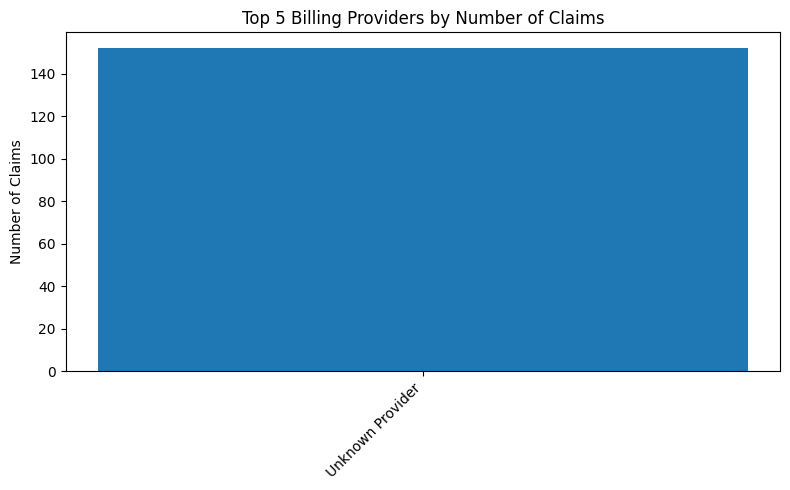

In [ ]:
# Bar chart of top 5 providers by claim count
plt.figure(figsize=(8, 5))

plt.bar(top5_providers[billing_name_col].astype(str), top5_providers["ClaimCount"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Claims")
plt.title("Top 5 Billing Providers by Number of Claims")
plt.tight_layout()
plt.show()



### Question 2: Payer Mix Analysis
- Top 5 primary payers by claim volume
- Percentage of total claims for each payer
- Visualization of payer distribution


In [47]:
payer_col = "PrimaryPayerName"  # adjust if needed

payer_counts = (
    df_header
    .groupby(payer_col)["ProspectiveClaimId"]
    .nunique()
    .reset_index(name="ClaimCount")
    .sort_values("ClaimCount", ascending=False)
)

payer_counts["PercentOfTotal"] = 100 * payer_counts["ClaimCount"] / payer_counts["ClaimCount"].sum()

top5_payers = payer_counts.head(5)
top5_payers


,PrimaryPayerName,ClaimCount,PercentOfTotal
17,MEDICARE,242,62.371134
12,HEALTHFIRST FFS,46,11.855670
9,FIDELIS/BETTER HEALTH PLAN,26,6.701031
14,HIP MEDICAID,17,4.381443
10,HEALTHFIRST CAPITATED,10,2.577320


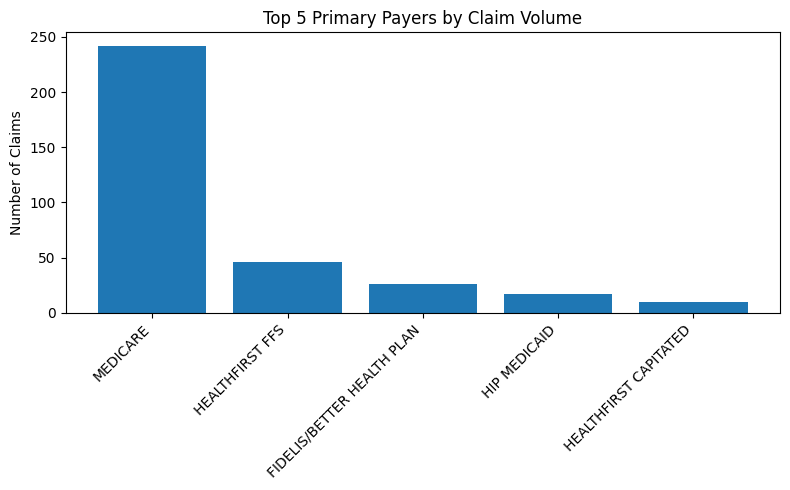

In [48]:
plt.figure(figsize=(8, 5))

plt.bar(top5_payers[payer_col].astype(str), top5_payers["ClaimCount"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Claims")
plt.title("Top 5 Primary Payers by Claim Volume")
plt.tight_layout()
plt.show()


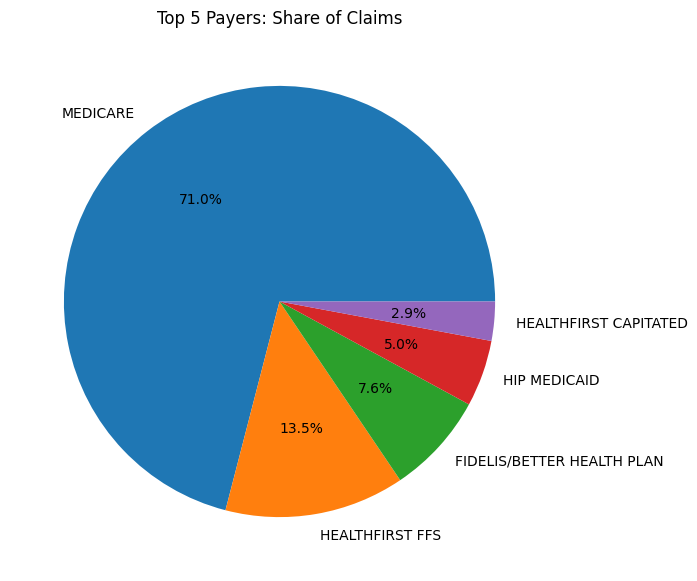

In [49]:
plt.figure(figsize=(7, 7))

plt.pie(
    top5_payers["ClaimCount"],
    labels=top5_payers[payer_col].astype(str),
    autopct="%1.1f%%"
)
plt.title("Top 5 Payers: Share of Claims")
plt.show()


### Question 3: Common Diagnoses
- 10 most frequently appearing diagnosis codes (`CodeValue`)



In [50]:
dx_counts = df_code["CodeValue"].value_counts().reset_index()
dx_counts.columns = ["CodeValue", "Frequency"]

top10_dx = dx_counts.head(10)
top10_dx


,CodeValue,Frequency
0,J96.01,62
1,I10,49
2,E78.5,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


### Question 4: Common Procedures
- 10 most frequently billed procedure codes (`HCPCS`)
- Display code, description (if available), and frequency
- Bar chart of top 10 procedures


In [51]:
procedure_counts = df_line["HCPCS"].value_counts().reset_index()
procedure_counts.columns = ["HCPCS", "Frequency"]

top10_procedures = procedure_counts.head(10)
top10_procedures


,HCPCS,Frequency
0,99291,68
1,99233,48
2,99213,39
3,99223,33
4,99222,32
5,99232,21
6,90833,16
7,99204,14
8,99214,14
9,92557,14


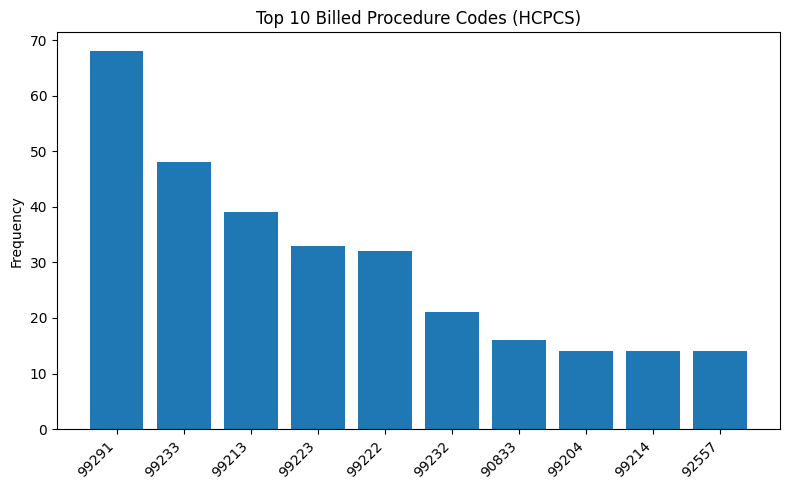

In [52]:
plt.figure(figsize=(8, 5))

plt.bar(top10_procedures["HCPCS"].astype(str), top10_procedures["Frequency"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Top 10 Billed Procedure Codes (HCPCS)")
plt.tight_layout()
plt.show()


### Question 5: Service Location Analysis
- Number of claims per `PlaceOfService`
- Percentage of claims that are **INPATIENT** vs **DOCTOR'S OFFICE**


In [53]:
pos_col = "PlaceOfService"  # adjust if needed

pos_counts = (
    df_header
    .groupby(pos_col)["ProspectiveClaimId"]
    .nunique()
    .reset_index(name="ClaimCount")
    .sort_values("ClaimCount", ascending=False)
)

pos_counts


,PlaceOfService,ClaimCount
1,21,231
0,11,132
2,22,24
3,23,1


In [54]:
# Normalize to uppercase for comparison
pos_col = "Facility_Location"
pos_upper = df_header[pos_col].str.upper()

total_claims = df_header["ProspectiveClaimId"].nunique()

inpatient_claims = df_header.loc[pos_upper == "INPATIENT", "ProspectiveClaimId"].nunique()
office_claims    = df_header.loc[pos_upper == "DOCTOR'S OFFICE", "ProspectiveClaimId"].nunique()

print("Total claims:", total_claims)
print("INPATIENT claims:", inpatient_claims, f"({inpatient_claims / total_claims * 100:.1f}%)")
print("DOCTOR'S OFFICE claims:", office_claims, f"({office_claims / total_claims * 100:.1f}%)")

Total claims: 388
INPATIENT claims: 231 (59.5%)
DOCTOR'S OFFICE claims: 132 (34.0%)


## Part 3: Advanced Analysis with Joins

### Question 6: Claims with High Service Line Counts
- Merge HEADER and LINE
- Calculate number of service lines per claim
- Identify claims with ≥ 5 service lines
- Display: ClaimId, provider name, number of lines, total charges


In [55]:
# Ensure Charges is numeric
df_line["Charges"] = pd.to_numeric(df_line["Charges"], errors="coerce")

# Merge header and line on ProspectiveClaimId
df_header_line = df_header.merge(
    df_line,
    how="inner",
    on="ProspectiveClaimId",
    suffixes=("_hdr", "_line")
)

# Aggregate at claim level
claim_line_summary = (
    df_header_line
    .groupby("ProspectiveClaimId")
    .agg(
        NumLines=("LinePos", "count"),
        TotalCharges=("Charges", "sum"),
        BillingProviderNPI=(billing_npi_col, "first"),
        BillingProviderName=(billing_name_col, "first")
    )
    .reset_index()
)

# Filter claims with 5 or more lines
high_line_claims = claim_line_summary[claim_line_summary["NumLines"] >= 5]
high_line_claims.head()


,ProspectiveClaimId,NumLines,TotalCharges,BillingProviderNPI,BillingProviderName
79,36668119,6,1030,1538114723,Unknown Provider
109,36710175,5,873,1538114723,Unknown Provider
125,36740402,6,945,1538114723,Unknown Provider
135,36757684,5,873,1538114723,Unknown Provider
151,36794825,7,1163,1083660575,Unknown Provider


### Question 7: Diagnosis–Procedure Combinations
- Merge claims with both procedures and diagnoses
- Find the most common diagnosis code associated with CPT/HCPCS `99291`


In [56]:
# First: claim + line
# Then merge with code
df_full = df_header_line.merge(
    df_code,
    how="inner",
    on="ProspectiveClaimId",
    suffixes=("", "_dx")
)

df_full.head()


,ClientId_hdr,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,...,DxMap2,DxMap3,DxMap4,ServiceDate,ServiceThruDate,Units,Charges,PlaceOfService_line,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId_line,CodeName,ClientProcedureCode,ClientProcedureName,ClientId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,...,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABK,1,I60.8,NaN,NaN,NaN,NaN
1,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,...,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,2,I61.9,NaN,NaN,NaN,NaN
2,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,...,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,5,G93.2,NaN,NaN,NaN,NaN
3,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,...,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,9,E78.5,NaN,NaN,NaN,NaN
4,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,...,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,10,G90.8,NaN,NaN,NaN,NaN


In [57]:
# Filter to HCPCS 99291
df_99291 = df_full[df_full["HCPCS"] == 99291]

# If HCPCS is stored as string, uncomment:
# df_99291 = df_full[df_full["HCPCS"].astype(str) == "99291"]

dx_for_99291 = (
    df_99291["CodeValue"]
    .value_counts()
    .reset_index()
)
dx_for_99291.columns = ["CodeValue", "Frequency"]

dx_for_99291.head(10)  # top diagnosis codes associated with 99291


,CodeValue,Frequency


### Question 8: Charges by Payer

- Merge HEADER and LINE
- Compute total charges per claim
- Group by `PrimaryPayerName`
- For each payer, compute:
  - Total charges
  - Average charges per claim
  - Number of claims
- Sort by total charges and show top 10 payers


In [58]:

claim_charges = (
    df_header_line
    .groupby(["ProspectiveClaimId", payer_col])
    .agg(
        ClaimTotalCharges=("Charges", "sum")
    )
    .reset_index()
)

claim_charges.head()


,ProspectiveClaimId,PrimaryPayerName,ClaimTotalCharges
0,35216986,AETNA,1155
1,35235657,AETNA,1155
2,35244774,AETNA,1155
3,35249003,UNITED COMMUNITY PLAN GOVT PROGRAM,1155
4,35249014,MMIS,1155


In [59]:
payer_charge_summary = (
    claim_charges
    .groupby(payer_col)
    .agg(
        TotalCharges=("ClaimTotalCharges", "sum"),
        NumClaims=("ProspectiveClaimId", "nunique"),
        AvgChargesPerClaim=("ClaimTotalCharges", "mean")
    )
    .reset_index()
    .sort_values("TotalCharges", ascending=False)
)

top10_payers_by_charges = payer_charge_summary.head(10)
top10_payers_by_charges


,PrimaryPayerName,TotalCharges,NumClaims,AvgChargesPerClaim
17,MEDICARE,131008,242,541.355372
12,HEALTHFIRST FFS,29794,46,647.695652
9,FIDELIS/BETTER HEALTH PLAN,10810,26,415.769231
14,HIP MEDICAID,10014,17,589.058824
0,AETNA,6930,6,1155.000000
4,DIRECT SELF PAY,6575,6,1095.833333
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,5,1035.000000
10,HEALTHFIRST CAPITATED,4905,10,490.500000
7,EMPIRE BLUE SR,4620,4,1155.000000
15,MAGNACARE,3465,3,1155.000000


## Part 4: Creative Analysis

### Question 9: Relationship between Place of Service and Average Claim Charges

**Question:**  
How do average total claim charges differ by `PlaceOfService`?



In [60]:
# 1. Claim-level total charges (reusing df_header_line)
claim_totals = (
    df_header_line
    .groupby("ProspectiveClaimId")
    .agg(
        ClaimTotalCharges=("Charges", "sum")
    )
    .reset_index()
)

# 2. Merge back with HEADER to get PlaceOfService
claim_with_pos = df_header.merge(
    claim_totals,
    how="inner",
    on="ProspectiveClaimId"
)

claim_with_pos.head()


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo,BillingProviderName,ClaimTotalCharges
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-25,2023-09-25,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Unknown Provider,1155
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,2023-09-27,2023-09-27,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Unknown Provider,1155
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-28,2023-09-28,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Unknown Provider,1155
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-29,2023-09-29,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Unknown Provider,1155
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-28,2023-09-28,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Unknown Provider,1155


In [61]:
pos_charge_summary = (
    claim_with_pos
    .groupby(pos_col)
    .agg(
        NumClaims=("ProspectiveClaimId", "nunique"),
        TotalCharges=("ClaimTotalCharges", "sum"),
        AvgChargesPerClaim=("ClaimTotalCharges", "mean")
    )
    .reset_index()
    .sort_values("AvgChargesPerClaim", ascending=False)
)

pos_charge_summary


,Facility_Location,NumClaims,TotalCharges,AvgChargesPerClaim
0,AMBULATORY SURGERY,10,19125,1912.500000
3,INPATIENT,231,156755,678.593074
1,DOCTOR'S OFFICE,132,55955,423.901515
2,EMERGENCY,1,410,410.000000
4,OUTPATIENT HOSPITAL,14,4626,330.428571


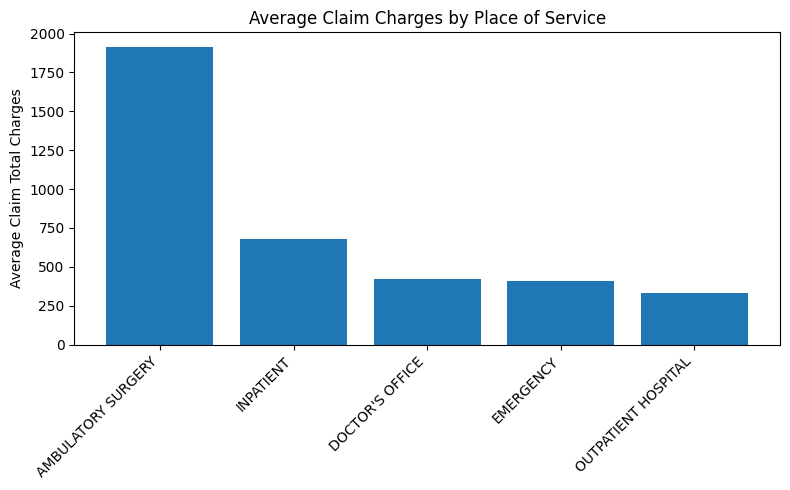

In [62]:
plt.figure(figsize=(8, 5))

plt.bar(
    pos_charge_summary[pos_col].astype(str),
    pos_charge_summary["AvgChargesPerClaim"]
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Claim Total Charges")
plt.title("Average Claim Charges by Place of Service")
plt.tight_layout()
plt.show()


### Interpretation (Question 9)

- The place of service with the **highest average claim charges** is: `Ambulatory Surgery`
- The place with the **lowest average claim charges** is: `Outpatient Hospital`
- This suggests that services performed in `Amb Surg` settings tend to be more resource-intensive or complex than those in `Outpatient Hospital`.
- These findings could help inform:
  - Resource allocation by service location
  - Negotiations with payers for specific sites of care

